In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
np.random.seed(42)
n_samples = 100

In [3]:
data = {
    'jumlah_pengunjung': np.random.normal(500, 100, n_samples),
    'biaya_marketing': np.random.normal(1000, 200, n_samples),
    'harga_produk': np.random.normal(50, 10, n_samples),
    'rating_toko': np.random.uniform(3.5, 5, n_samples),
    'jumlah_staff': np.random.randint(5, 15, n_samples),
}

In [4]:
data['penjualan'] = (
    0.3 * data['jumlah_pengunjung'] +
    0.2 * data['biaya_marketing'] +
    -0.1 * data['harga_produk'] +
    100 * data['rating_toko'] +
    50 * data['jumlah_staff'] +
    np.random.normal(0, 100, n_samples)
)

In [5]:
df = pd.DataFrame(data)

In [6]:
def analyze_correlations(df):
    """Menganalisis berbagai jenis korelasi untuk dataset"""
    
    # 1. Pearson Correlation Matrix
    pearson_corr = df.corr(method='pearson')
    
    # 2. Spearman Correlation Matrix
    spearman_corr = df.corr(method='spearman')
    
    # 3. Kendall Correlation Matrix
    kendall_corr = df.corr(method='kendall')
    
    # 4. Detailed correlation analysis dengan penjualan
    detailed_analysis = {}
    target = 'penjualan'
    
    for column in df.columns:
        if column != target:
            # Pearson correlation
            pearson_coef, pearson_p = stats.pearsonr(df[column], df[target])
            
            # Spearman correlation
            spearman_coef, spearman_p = stats.spearmanr(df[column], df[target])
            
            # Kendall correlation
            kendall_coef, kendall_p = stats.kendalltau(df[column], df[target])
            
            detailed_analysis[column] = {
                'pearson': {'coef': pearson_coef, 'p_value': pearson_p},
                'spearman': {'coef': spearman_coef, 'p_value': spearman_p},
                'kendall': {'coef': kendall_coef, 'p_value': kendall_p}
            }
    
    return {
        'pearson_matrix': pearson_corr,
        'spearman_matrix': spearman_corr,
        'kendall_matrix': kendall_corr,
        'detailed_analysis': detailed_analysis
    }

In [7]:
results = analyze_correlations(df)

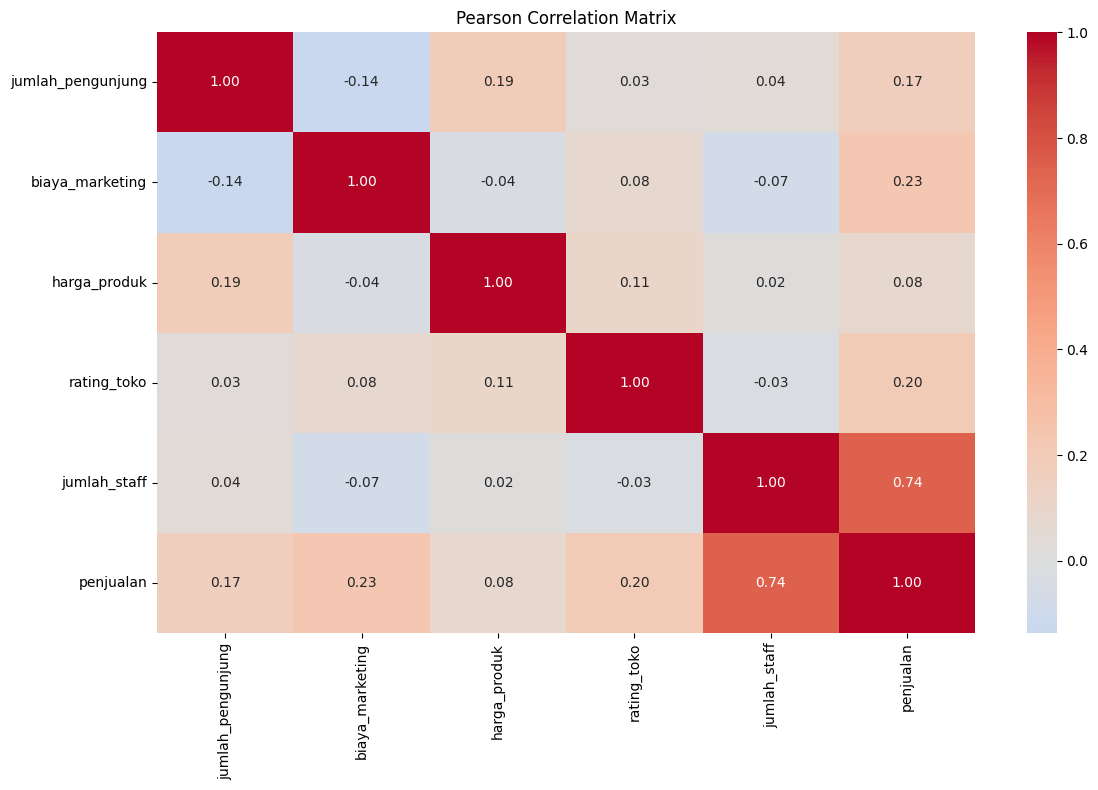

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(results['pearson_matrix'], 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.tight_layout()

In [9]:
print("\nAnalisis Korelasi Detail dengan Penjualan:")
print("-" * 50)
for variable, analysis in results['detailed_analysis'].items():
    print(f"\nVariabel: {variable}")
    print("Pearson Correlation:")
    print(f"  Coefficient: {analysis['pearson']['coef']:.3f}")
    print(f"  P-value: {analysis['pearson']['p_value']:.3f}")
    
    print("Spearman Correlation:")
    print(f"  Coefficient: {analysis['spearman']['coef']:.3f}")
    print(f"  P-value: {analysis['spearman']['p_value']:.3f}")
    
    print("Kendall Correlation:")
    print(f"  Coefficient: {analysis['kendall']['coef']:.3f}")
    print(f"  P-value: {analysis['kendall']['p_value']:.3f}")


Analisis Korelasi Detail dengan Penjualan:
--------------------------------------------------

Variabel: jumlah_pengunjung
Pearson Correlation:
  Coefficient: 0.174
  P-value: 0.084
Spearman Correlation:
  Coefficient: 0.215
  P-value: 0.032
Kendall Correlation:
  Coefficient: 0.143
  P-value: 0.036

Variabel: biaya_marketing
Pearson Correlation:
  Coefficient: 0.229
  P-value: 0.022
Spearman Correlation:
  Coefficient: 0.161
  P-value: 0.110
Kendall Correlation:
  Coefficient: 0.115
  P-value: 0.090

Variabel: harga_produk
Pearson Correlation:
  Coefficient: 0.081
  P-value: 0.423
Spearman Correlation:
  Coefficient: 0.047
  P-value: 0.639
Kendall Correlation:
  Coefficient: 0.029
  P-value: 0.672

Variabel: rating_toko
Pearson Correlation:
  Coefficient: 0.198
  P-value: 0.048
Spearman Correlation:
  Coefficient: 0.176
  P-value: 0.080
Kendall Correlation:
  Coefficient: 0.112
  P-value: 0.099

Variabel: jumlah_staff
Pearson Correlation:
  Coefficient: 0.744
  P-value: 0.000
Spearma

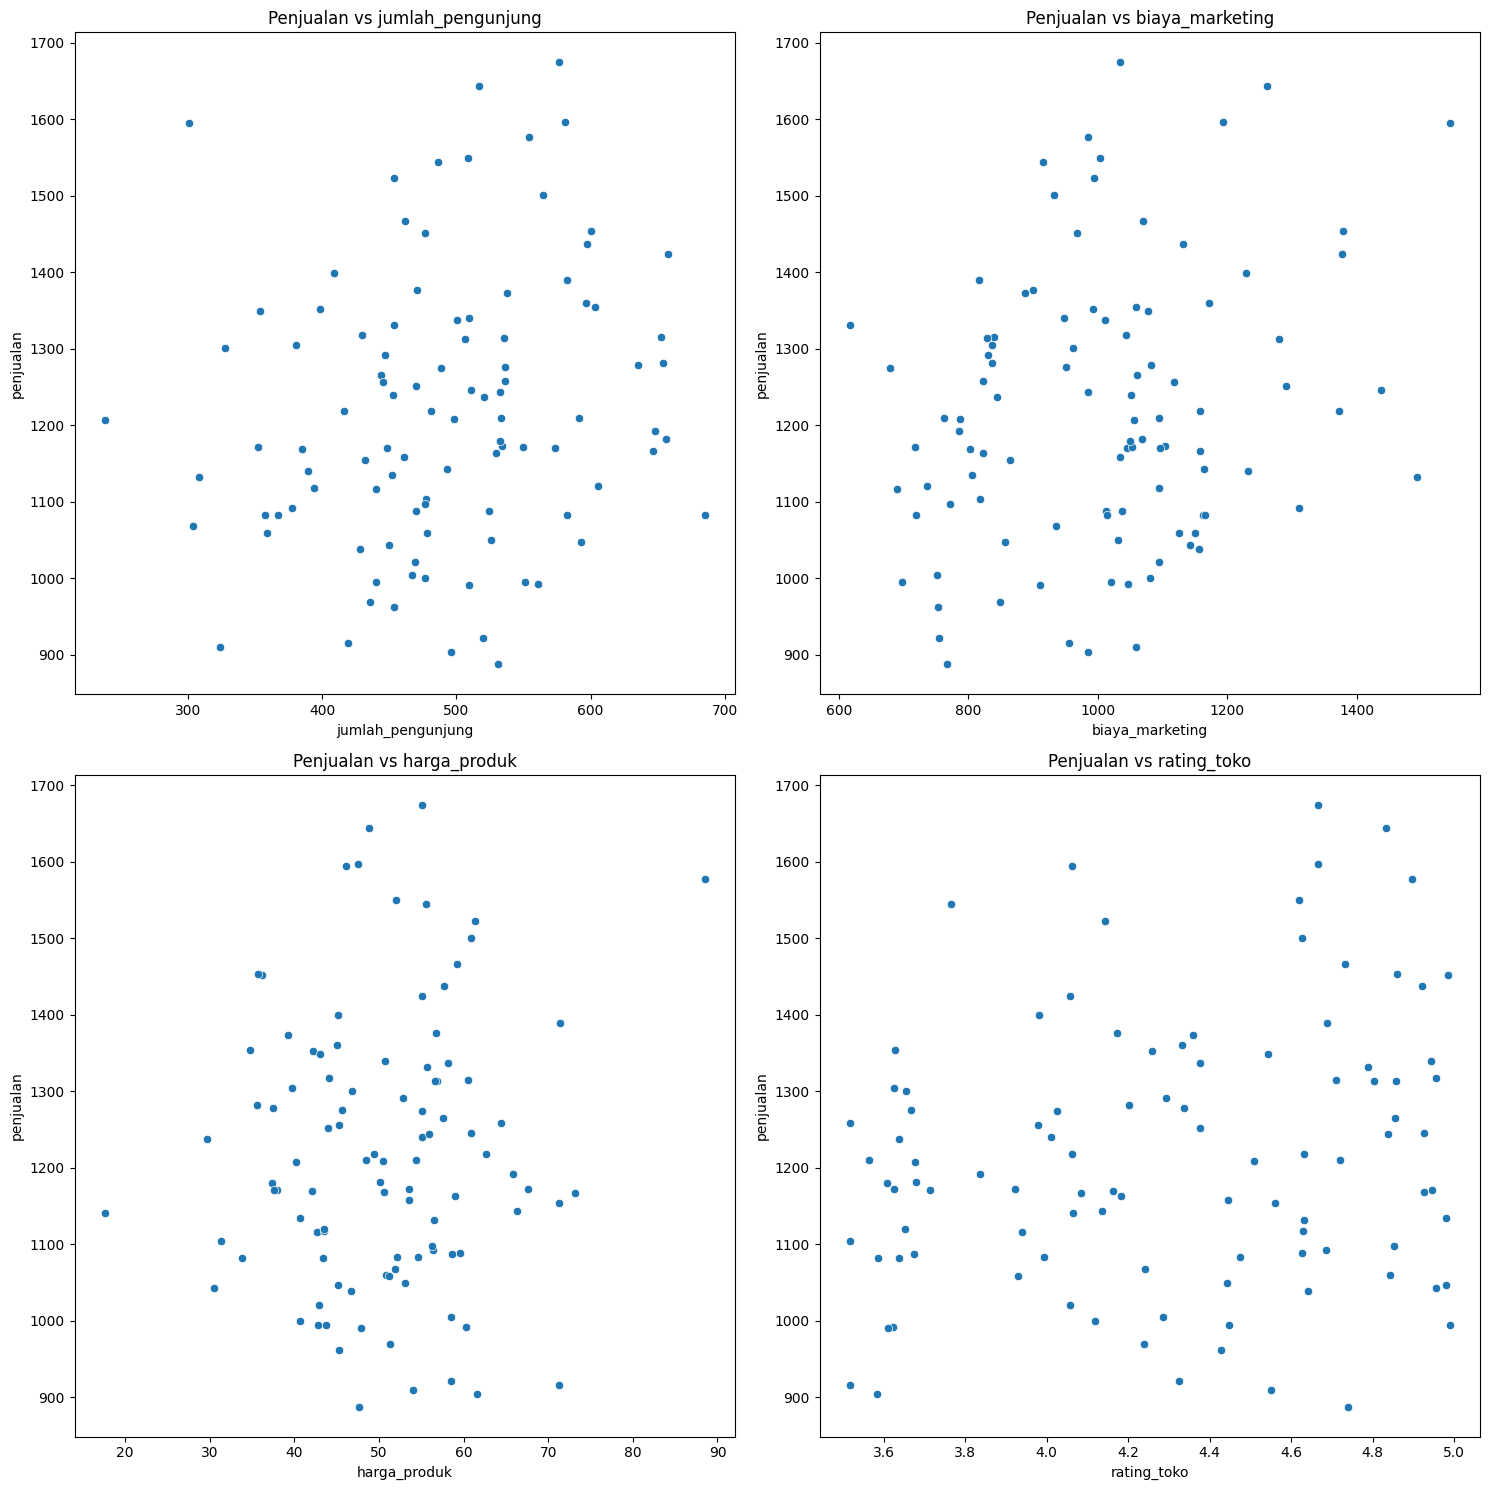

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

variables = [col for col in df.columns if col != 'penjualan']
for i, var in enumerate(variables[:4]):  # Plot 4 variabel pertama
    sns.scatterplot(data=df, x=var, y='penjualan', ax=axes[i])
    axes[i].set_title(f'Penjualan vs {var}')

plt.tight_layout()

In [11]:
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
       jumlah_pengunjung  biaya_marketing  harga_produk  rating_toko  \
count         100.000000       100.000000    100.000000   100.000000   
mean          489.615348      1004.460917     50.648963     4.296350   
std            90.816843       190.733793     10.842829     0.468520   
min           238.025490       616.245757     17.587327     3.516256   
25%           439.909433       838.867895     43.445565     3.937004   
50%           487.304371      1016.821434     50.976957     4.327537   
75%           540.595205      1107.634090     57.044374     4.693089   
max           685.227818      1544.033833     88.527315     4.989447   

       jumlah_staff    penjualan  
count    100.000000   100.000000  
mean       9.140000  1216.921191  
std        2.961095   178.015257  
min        5.000000   887.766161  
25%        6.000000  1086.241055  
50%        9.000000  1199.795501  
75%       12.000000  1320.900626  
max       14.000000  1674.398877  
